In [22]:
#Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats as st
import seaborn as sns
# pd.set_option('display.max_rows', None)

In [23]:
# Bring in CSV and Read in the File
file = Path("../Resources/clean_winemag_data.csv")
wine_df = pd.read_csv(file, index_col=0)

#Display Data Frame
wine_df.head()

,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Avidagos,NaN,Douro,Portugal,15.0,87.0,Roger Voss,@vossroger,"This is ripe and fruity, a wine that is smooth..."
2,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,NaN,Willamette Valley,Oregon,US,14.0,87.0,Paul Gregutt,@paulgwine,"Tart and snappy, the flavors of lime flesh and..."
3,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Reserve Late Harvest,Lake Michigan Shore,Michigan,US,13.0,87.0,Alexander Peartree,NaN,"Pineapple rind, lemon pith and orange blossom ..."
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Vintner's Reserve Wild Child Block,Willamette Valley,Oregon,US,65.0,87.0,Paul Gregutt,@paulgwine,"Much like the regular bottling from 2012, this..."
5,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Ars In Vitro,Navarra,Northern Spain,Spain,15.0,87.0,Michael Schachner,@wineschach,Blackberry and raspberry aromas show a typical...


In [25]:
#Take the top 10 wine types from the DataFrame wine_df 
#Turn it into a list
my_sample = list(wine_df["Type"].value_counts()[:10].index)

my_sample

['Pinot Noir',
 'Chardonnay',
 'Cabernet Sauvignon',
 'Red Blend',
 'Bordeaux-style Red Blend',
 'Riesling',
 'Sauvignon Blanc',
 'Syrah',
 'Rosé',
 'Merlot']

In [35]:
#How many rating are in each wine type
top_ten_types = wine_df["Type"].value_counts()[:10]

top_ten_types


Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Name: Type, dtype: int64

In [ ]:
#New DataFrame with "Type" values that match in my_sample list
sample_df = wine_df[wine_df["Type"].isin(my_sample)]
sample_df

,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
3,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Reserve Late Harvest,Lake Michigan Shore,Michigan,US,13.0,87.0,Alexander Peartree,NaN,"Pineapple rind, lemon pith and orange blossom ..."
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Vintner's Reserve Wild Child Block,Willamette Valley,Oregon,US,65.0,87.0,Paul Gregutt,@paulgwine,"Much like the regular bottling from 2012, this..."
10,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,Mountain Cuvée,Napa Valley,California,US,19.0,87.0,Virginie Boone,@vboone,"Soft, supple plum envelopes an oaky structure ..."
12,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,NaN,Alexander Valley,California,US,34.0,87.0,Virginie Boone,@vboone,"Slightly reduced, this wine offers a chalky, t..."
14,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou,NaN,Central Coast,California,US,12.0,87.0,Matt Kettmann,@mattkettmann,Building on 150 years and six generations of w...
...,...,...,...,...,...,...,...,...,...,...,...,...
129958,Babich 2010 Irongate Red (Hawke's Bay),Bordeaux-style Red Blend,Babich,Irongate,NaN,Hawke's Bay,New Zealand,35.0,90.0,Joe Czerwinski,@JoeCz,This blend of Cabernet Sauvignon-Merlot and Ca...
129960,Caves Transmontanas 2006 Vértice Pinot Noir (D...,Pinot Noir,Caves Transmontanas,Vértice,NaN,Douro,Portugal,48.0,90.0,Roger Voss,@vossroger,"Fresh and fruity, this is full of red cherry f..."
129963,Dalton 2012 Oak Aged Cabernet Sauvignon (Galilee),Cabernet Sauvignon,Dalton,Oak Aged,NaN,Galilee,Israel,20.0,90.0,Mike DeSimone,@worldwineguys,"A bouquet of black cherry, tart cranberry and ..."
129966,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Brauneberger Juffer-Sonnenuhr Spätlese,NaN,Mosel,Germany,28.0,90.0,Anna Lee C. Iijima,NaN,Notes of honeysuckle and cantaloupe sweeten th...


In [ ]:
#DataFrame of top bottles of the top ten wine types rated and correlations
#Empty list for wine correlations
results = []

#Looping through each of the 10 wines to find its correlation (price and rating)
for t in my_sample:
    temp_df = wine_df[wine_df["Type"] == t]
    temp_corr = temp_df[["Price" , "Rating"]].corr()
    c = temp_corr.iloc[1,0]
    result = {"Wine Types": t, "Correlation": c}
    results.append(result)

wine_corr = pd.DataFrame(results).sort_values(by="Correlation", ascending=False)
wine_corr

,Wine Types,Correlation
2,Cabernet Sauvignon,0.556685
6,Sauvignon Blanc,0.530771
3,Red Blend,0.462397
9,Merlot,0.440685
1,Chardonnay,0.429073
7,Syrah,0.397914
5,Riesling,0.397714
0,Pinot Noir,0.375345
4,Bordeaux-style Red Blend,0.351368
8,Rosé,0.262412


In [ ]:
#Save DataFrame
wine_corr.to_csv("../Resources/results.csv" , index=False)

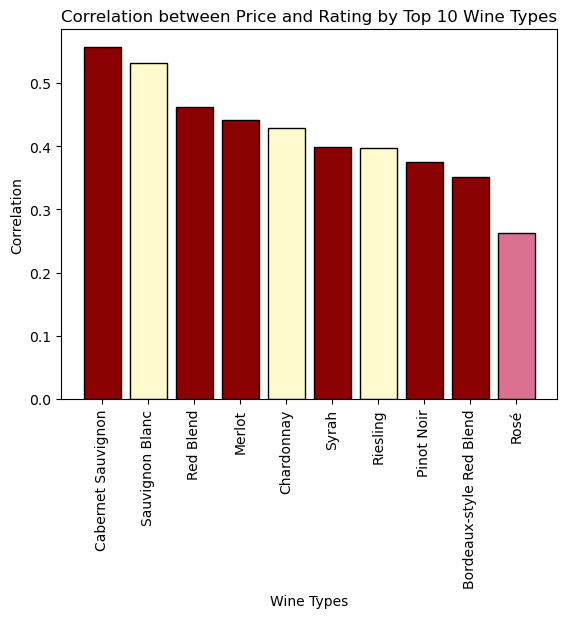

In [ ]:
#Creating a bar chart for the correlation of price and wines of the top ten wine types 

colors = ["darkred", "lemonchiffon", "darkred", "darkred", "lemonchiffon", "darkred", "lemonchiffon", "darkred", "darkred", "palevioletred"]

#Bar chart
plt.bar(wine_corr["Wine Types"], wine_corr["Correlation"], color = colors, edgecolor = "black")


# Add labels and title
plt.xlabel("Wine Types")
plt.ylabel("Correlation")
plt.title("Correlation between Price and Rating by Top 10 Wine Types")

plt.xticks(rotation=90)

plt.show()

In [ ]:
plt.savefig("wine_bar_chart_rk")

<Figure size 640x480 with 0 Axes>

In [ ]:
temp_corr.iloc[1,0]

0.44068476508339305

In [ ]:
all_corr = pearsonr(sample_df["Price"], sample_df["Rating"])

all_corr

PearsonRResult(statistic=0.40493499144875433, pvalue=0.0)

In [ ]:
sample_df.groupby("Type")["Price", "Rating"].corr().reset_index()

/var/folders/_s/xr22rb0d74l36001gkdblyy80000gp/T/ipykernel_21267/856204746.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sample_df.groupby("Type")["Price", "Rating"].corr().reset_index()


,Type,level_1,Price,Rating
0,Bordeaux-style Red Blend,Price,1.000000,0.351368
1,Bordeaux-style Red Blend,Rating,0.351368,1.000000
2,Cabernet Sauvignon,Price,1.000000,0.556685
3,Cabernet Sauvignon,Rating,0.556685,1.000000
4,Chardonnay,Price,1.000000,0.429073
5,Chardonnay,Rating,0.429073,1.000000
6,Merlot,Price,1.000000,0.440685
7,Merlot,Rating,0.440685,1.000000
8,Pinot Noir,Price,1.000000,0.375345
9,Pinot Noir,Rating,0.375345,1.000000


In [ ]:
# count of all the values in the df
wine_df.count()

Bottle Name                 120915
Type                        120915
Winery                      120915
Designation                  86148
Region                      101400
Province                    120915
Country                     120915
Price                       120915
Rating                      120915
Sommelier                    96420
Sommelier Twitter Handle     91500
Description                 120915
dtype: int64